## References

- [RDKit Documentation](https://www.rdkit.org/docs/GettingStartedInPython.html)
- [PubChem](https://pubchem.ncbi.nlm.nih.gov/) - find SDF files for molecules


## Init Parameters


In [87]:
from rdkit import Chem
from rdkit.Chem import Draw

from src import SDF_DIR

file = "2-methylpropan-2-olate.sdf"

## Sandbox


In [88]:
# Loads Molecule from file to python object
suppl = Chem.SDMolSupplier(f"{SDF_DIR.joinpath(file)}")

mols = [x for x in suppl]  # one line for loop syntax, must know, very handy
print(f"The file '{file}' contains '{len(mols)}' molecule(s).")

assert len(mols) > 0  # make sure the file was loaded correctly
mol = mols[0]  # SDF files can contain multiple molecules - we work with just one now


The file '2-methylpropan-2-olate.sdf' contains '1' molecule(s).


In [89]:
# Calling some basic functions on molecule object
print(f"Heavy Atom Number: {mol.GetNumAtoms()}")
print(f"All Atom Number: {mol.GetNumAtoms(onlyExplicit=False)}")
print(f"SMILES format: '{Chem.MolToSmiles(mol)}'")


Heavy Atom Number: 5
All Atom Number: 14
SMILES format: 'CC(C)(C)[O-]'


In [90]:
# Calling some basic functions on atoms objects
atoms: list[Chem.Atom] = [a for a in mol.GetAtoms()]
for atom in atoms:
    print(
        f"""Atom: {atom.GetSymbol()}, AtomicNumber: {atom.GetAtomicNum()}, Mass: {atom.GetMass()}, GetIsAromatic: {atom.GetIsAromatic()}, GetHybridization: {atom.GetHybridization()}"""
    )


Atom: O, AtomicNumber: 8, Mass: 15.999, GetIsAromatic: False, GetHybridization: SP3
Atom: C, AtomicNumber: 6, Mass: 12.011, GetIsAromatic: False, GetHybridization: SP3
Atom: C, AtomicNumber: 6, Mass: 12.011, GetIsAromatic: False, GetHybridization: SP3
Atom: C, AtomicNumber: 6, Mass: 12.011, GetIsAromatic: False, GetHybridization: SP3
Atom: C, AtomicNumber: 6, Mass: 12.011, GetIsAromatic: False, GetHybridization: SP3


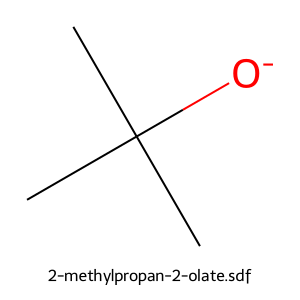

In [91]:
# Simple Drawing
img = Draw.MolToImage(mol, legend=file)
img

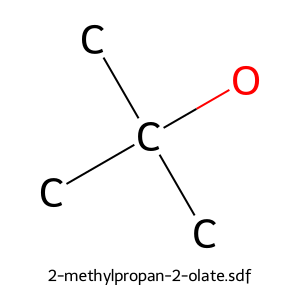

In [92]:
# Calling some basic function to draw structural patterns

# ensure no atoms are marked as “implicit” or hidden
for atom in mol.GetAtoms():
    atom.SetNoImplicit(True)
    atom.SetNumExplicitHs(atom.GetTotalNumHs())  # force explicit count

drawer = Draw.MolDraw2DCairo(300, 300)
opts = drawer.drawOptions()
opts.addAtomIndices = False
opts.explicitMethyl = True
opts.includeAtomTags = False
opts.useBWAtomPalette()

# force label property
for atom in mol.GetAtoms():
    atom.SetProp("atomLabel", atom.GetSymbol())

drawer.DrawMolecule(mol)
drawer.FinishDrawing()

img = Draw.MolToImage(mol, legend=file)
img
